# EXPLORATORY DATA ANALYSIS USING SQL

In [1]:
# Import necessary libraries
import os
import sqlite3
import pandas as pd
from config import CLEANED_DATA_PATH

In [2]:
def retrieve_data_from_db(db_name='stocks_data.db', table_name='stock_data'):
    # Construct the full path to the database file
    db_file_path = os.path.join(CLEANED_DATA_PATH, db_name)

    # Step 1: Connect to the SQLite database
    conn = sqlite3.connect(db_file_path)
    
    # Step 2: Query the database to retrieve all data from the table
    query = f"SELECT * FROM {table_name};"
    df = pd.read_sql(query, conn)
    
    # Close the connection
    conn.close()
    
    return df

# Retrieve the data
data = retrieve_data_from_db()

# Show the first few rows of the data to inspect it
data.head()

,id,date,close,adj_close,volume,symbol,close_pct_change,volume_pct_change,7_day_ma
0,1,2024-01-19,16.420000,16.420000,15287700,SNAP,1.317170,10.904397,127.153681
1,2,2024-01-22,16.610001,16.610001,19540600,SNAP,1.157129,27.819096,127.153681
2,3,2024-01-23,16.330000,16.330000,17034500,SNAP,-1.685736,-12.825092,127.153681
3,4,2024-01-24,16.320000,16.320000,17403900,SNAP,-0.061238,2.168540,127.153681
4,5,2024-01-25,16.290001,16.290001,14223000,SNAP,-0.183816,-18.276938,127.153681


### 1. Initial Overview of the Data
Check the structure of the table:

In [4]:
# Checking the column names and data types
print(data.dtypes)

id                     int64
date                  object
close                float64
adj_close            float64
volume                 int64
symbol                object
close_pct_change     float64
volume_pct_change    float64
7_day_ma             float64
dtype: object


In [13]:
# Descriptive statistics for numerical columns
data.describe()


,id,close,adj_close,volume,close_pct_change,volume_pct_change,7_day_ma
count,2510.000000,2510.000000,2510.000000,2.510000e+03,2510.000000,2510.000000,2510.000000
mean,1255.500000,127.305032,126.934397,8.019062e+06,1.317170,10.904397,127.153681
std,724.718911,197.142086,197.209924,1.092923e+07,40.872528,61.189435,196.232721
min,1.000000,2.830000,2.830000,6.860000e+04,-91.475568,-91.513904,3.015714
25%,628.250000,19.092500,18.962499,2.606725e+06,-1.020265,-22.884052,19.151761
50%,1255.500000,57.915001,57.459793,4.625100e+06,0.079112,-0.486301,57.929286
75%,1882.750000,142.084999,142.084999,9.409900e+06,1.114861,26.618181,144.005355
max,2510.000000,936.559998,936.559998,1.859776e+08,1451.895884,901.475589,923.405709


### 2. Time-Based Analysis

In [14]:
# Convert 'date' to datetime format (if it's not already)
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Extract the year from the 'date' column and group by it
data['year'] = data['date'].dt.year

# Count the number of records per year
yearly_counts = data.groupby('year').size()
print(yearly_counts)


year
2024    2400
2025     110
dtype: int64


In [15]:
# Check for the earliest and latest dates
earliest_date = data['date'].min()
latest_date = data['date'].max()

print(f"Earliest Date: {earliest_date}")
print(f"Latest Date: {latest_date}")


Earliest Date: 2024-01-19 00:00:00
Latest Date: 2025-01-17 00:00:00


3. Distributions and Aggregations
Find the total volume per year:

In [16]:
# Calculate total volume per year
total_volume_per_year = data.groupby('year')['volume'].sum()
print(total_volume_per_year)


year
2024    19250131700
2025      877712900
Name: volume, dtype: int64


In [17]:

# Average closing price per stock symbol
avg_close_per_symbol = data.groupby('symbol')['close'].agg(['mean', 'min', 'max'])
print(avg_close_per_symbol)


              mean         min         max
symbol                                    
ABNB    141.796016  113.010002  168.179993
CNQ      34.876096   29.510000   41.160000
D        52.711355   44.150002   60.930000
MNSO     19.557092   13.400000   27.559999
NFLX    688.895298  482.950012  936.559998
PG      165.797370  147.570007  179.699997
SHOP     79.171912   52.259998  119.489998
SNAP     12.375259    8.290000   17.450001
TIXT      5.853825    2.830000   11.380000
WMT      72.016095   53.500000   95.699997


### Trends Over Time
Find the average closing price per month:

In [18]:
# Extract month and year from 'date'
data['month'] = data['date'].dt.to_period('M')

# Calculate average closing price per month
avg_close_per_month = data.groupby('month')['close'].mean()
print(avg_close_per_month)


month
2024-01    109.367536
2024-02    113.957508
2024-03    120.088351
2024-04    117.892614
2024-05    119.541409
2024-06    123.669316
2024-07    122.656455
2024-08    120.912227
2024-09    126.470500
2024-10    132.413608
2024-11    145.137749
2024-12    155.025595
2025-01    147.576909
Freq: M, Name: close, dtype: float64


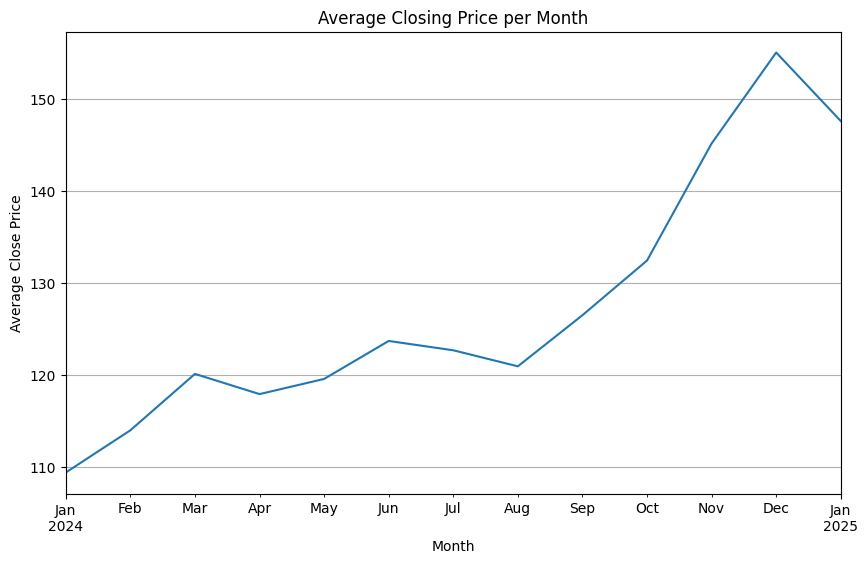

In [19]:
import matplotlib.pyplot as plt

# Plot average closing price per month
avg_close_per_month.plot(kind='line', figsize=(10, 6))
plt.title("Average Closing Price per Month")
plt.xlabel("Month")
plt.ylabel("Average Close Price")
plt.grid(True)
plt.show()
